In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [15]:
# load dataset
data_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [16]:
# EDA: Basic structure and missing values
print(data_df.info())
print(data_df.describe())
print(data_df.isnull().sum())
print(data_df['Attrition'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
# 4️⃣ Data Cleaning
data_df = data_df.drop(['EmployeeCount', 'Over18' , 'StandardHours' ,'EmployeeNumber'], axis=1)

In [18]:
# Encode categorical variables
label_enc_cols = ['Attrition', 'BusinessTravel', 'Department',
                  'EducationField', 'Gender', 'JobRole',
                  'MaritalStatus', 'OverTime']
le = LabelEncoder()
for col in label_enc_cols:
    data_df[col] = le.fit_transform(data_df[col])


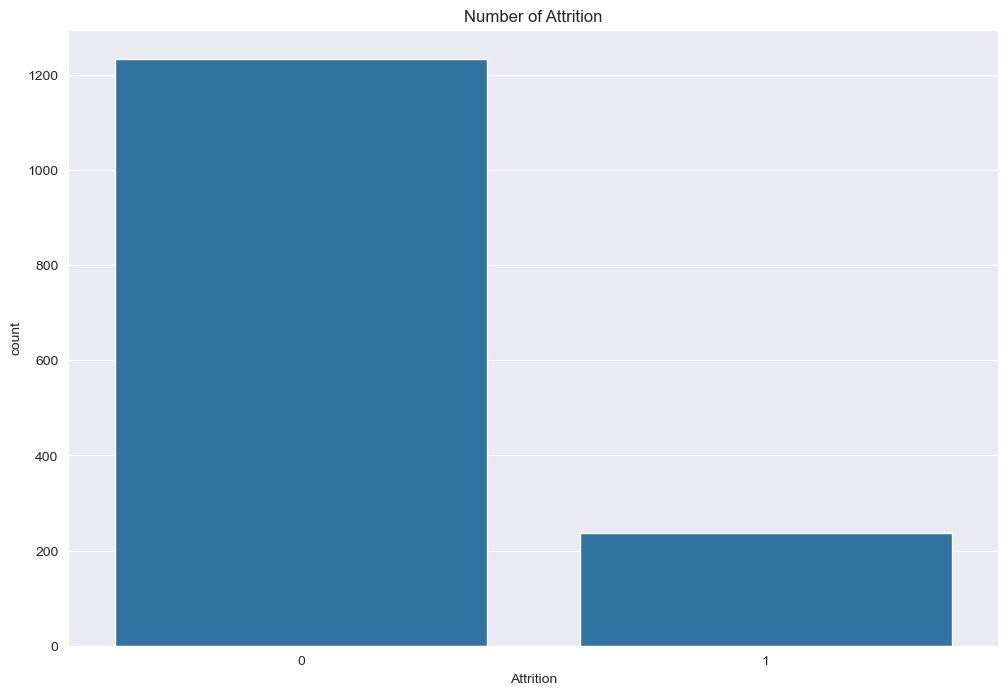

In [19]:
# EDA: Visualizing target distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition', data=data_df)
plt.title('Number of Attrition')
plt.show()

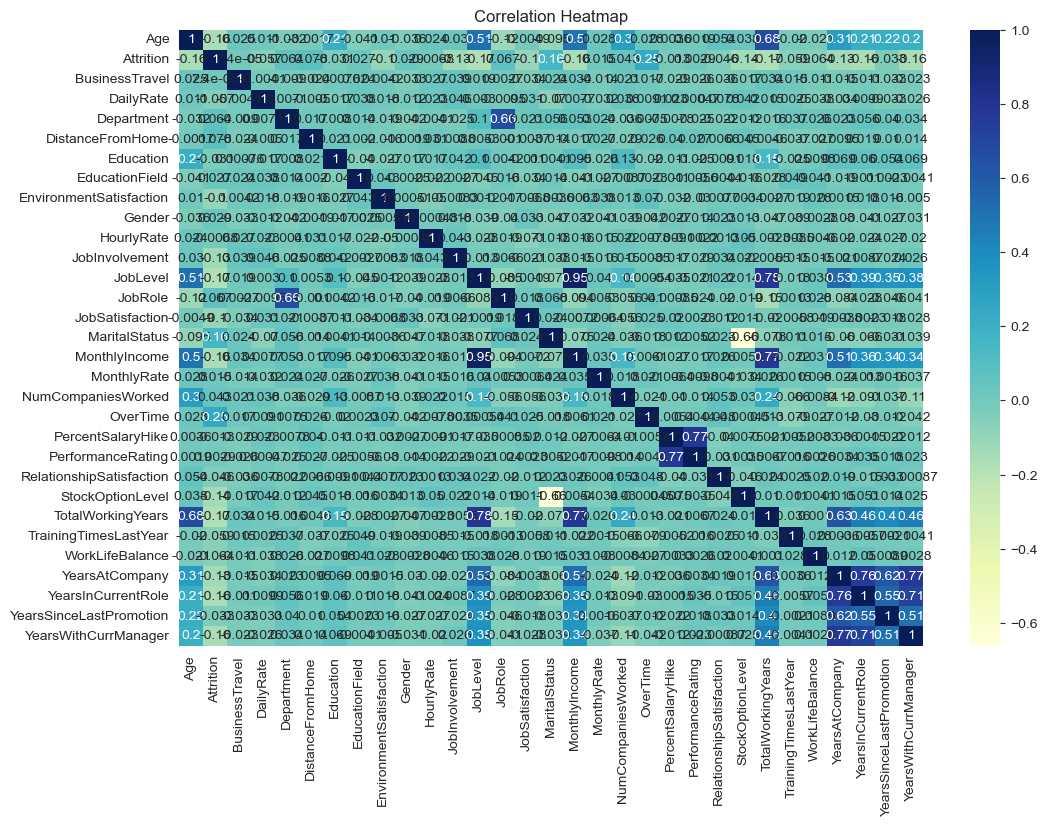

In [20]:
# EDA: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# 5️⃣# Encode categorical variables
label_enc_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
encoders = {}
for col in label_enc_cols:
    le = LabelEncoder()
    data_df[col] = le.fit_transform(data_df[col])
    encoders[col] = le

In [23]:
# Features and Target
X = data_df.drop('Attrition', axis=1)
y = data_df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [25]:
# Prediction
y_pred = model.predict(X_test_scaled)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8401360544217688
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294

Confusion Matrix:
 [[241   6]
 [ 41   6]]


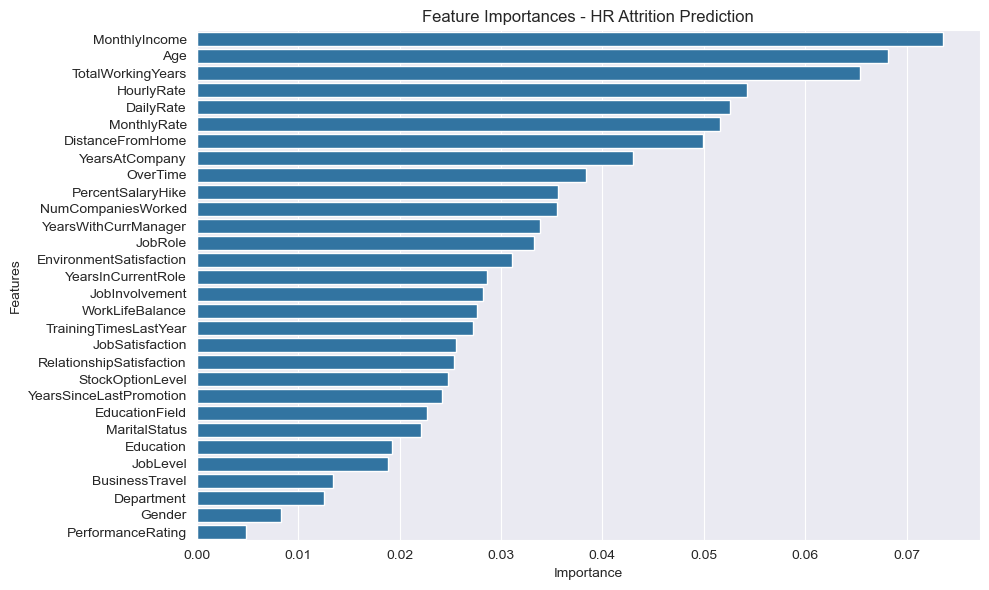

In [26]:
# Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title('Feature Importances - HR Attrition Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
